In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import beta

# Problem 1 : $\epsilon$-greedy & Softmax
Consider a 3-armed bandit
The reward functions are as follows:
1. arm1 : N(1, 0.5)
2. arm2 : N(0, 1)
3. arm3 : N(-2, 10)

Run the box below to see the reward functions

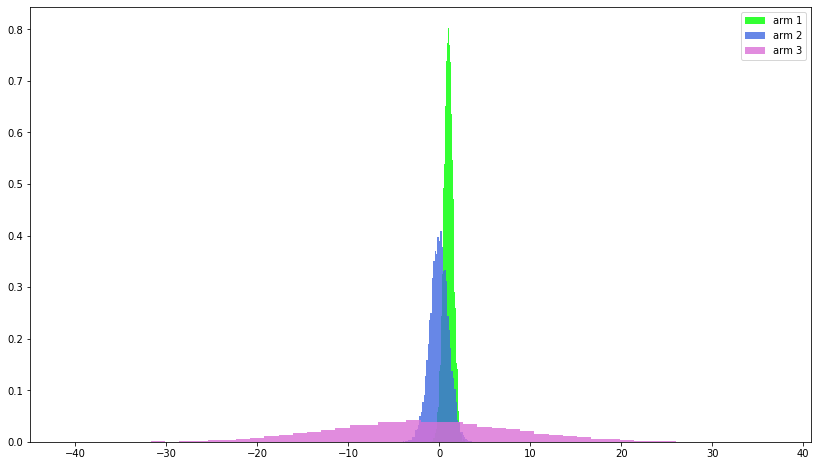

In [2]:
# Reward Distributions
arms_count = 3
mus = [1.0, 0.0, -2.0]
sigmas = [0.5, 1.0, 10.0]
colors = ['lime', 'royalblue', 'orchid']
sample_size = 10000
bins = 50

plt.figure(figsize=(14,8))
for mu, sigma, idx, color in zip(mus, sigmas, np.arange(arms_count), colors):
    sample = np.random.normal(mu, sigma, sample_size)
    plt.hist(sample, bins=bins, density=True, alpha=0.8, label=f'arm {idx+1}', color=color)
plt.legend()
plt.show()

### The play() function accepts an arm as input and returns the reward of playing that arm. Play the game for several trials with different arms to get a feeling of rewards.

In [3]:
def play(arm):
    reward = np.random.normal(mus[arm], sigmas[arm], 1)
#     print(f'Your move : arm {arm}  ******* Your reward : {reward[0]}')
    return reward



### Train an agent for 1000 trials using $\epsilon$-greedy policy with $\epsilon \in \{ 0.5, 0.7, 0.9 \}$ and plot the average reward against trials

In [4]:
def func(t = 1000, epsilon = 0.5):
    history = []
    mean_h = [0]
    trials = [0, 0, 0]
    means = np.array([0, 0, 0], dtype='float')
    for i in range(t):
        chance = np.random.uniform(0, 1)
        if chance < epsilon:
            choice = np.random.randint(3)
        else:
            choice = np.argmax(means)
        r = play(choice)
        trials[choice] += 1
        means[choice] += (1/trials[choice])*(r - means[choice])
        history.append(np.array(means))
        mean_h.append(mean_h[i] + (1/(i+1))*(r - mean_h[i]) )  
    return  history, mean_h

In [5]:
h, mean_h5= func(epsilon=0.5)
_, mean_h7= func(epsilon=0.7)
_, mean_h9= func(epsilon=0.9)

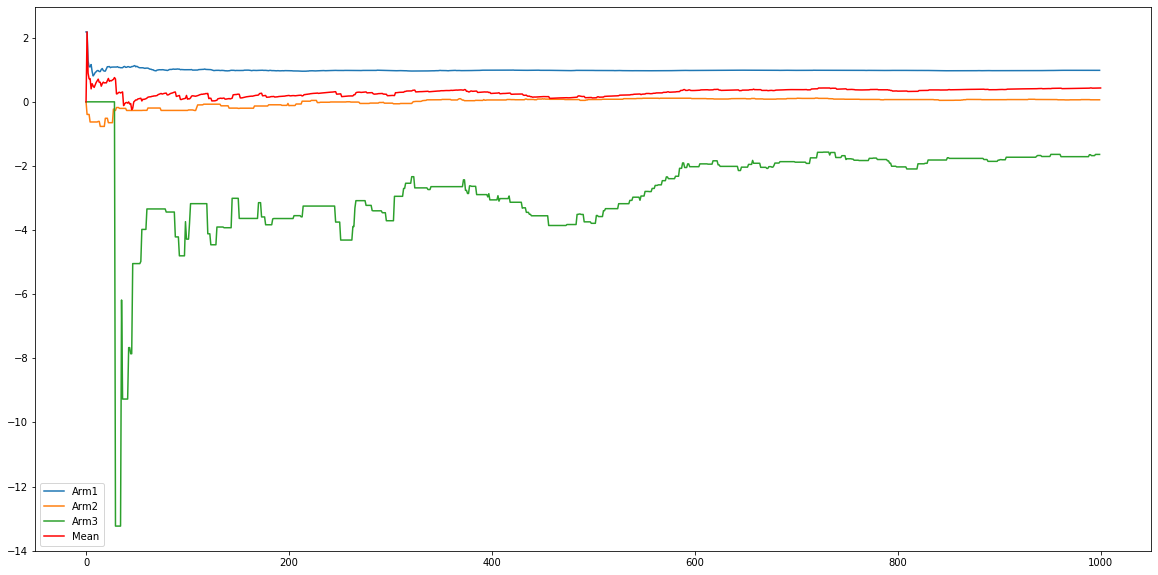

In [6]:
plt.figure(figsize=[20,10])
plt.plot(np.array(h).T[0], label = 'Arm1')
plt.plot(np.array(h).T[1], label = 'Arm2')
plt.plot(np.array(h).T[2], label = 'Arm3')
plt.plot(mean_h5, 'r', label = "Mean")
plt.legend()
plt.show()

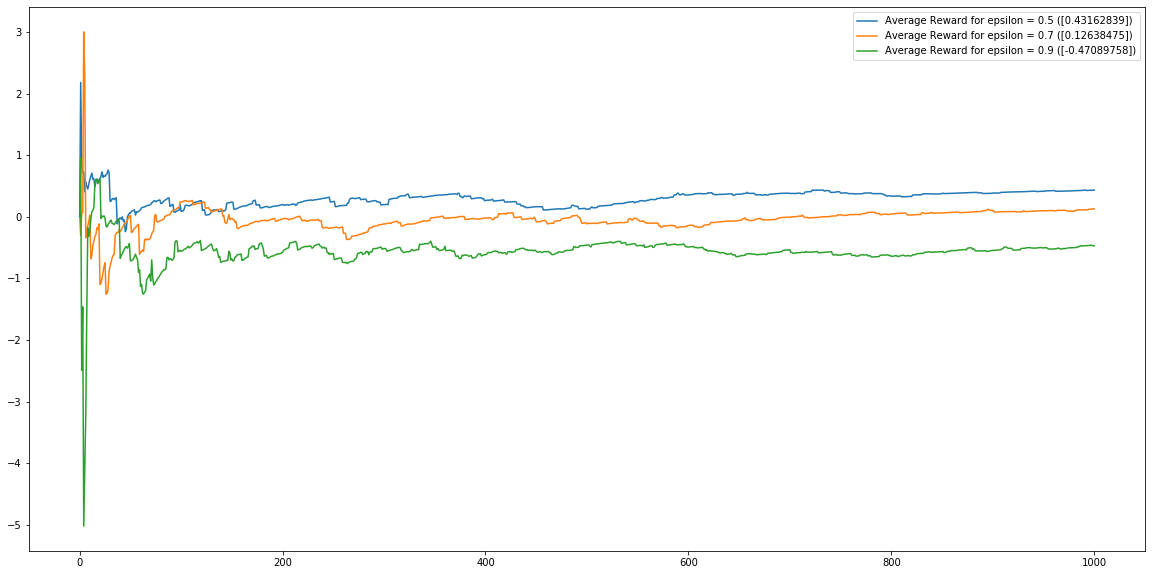

In [7]:
plt.figure(figsize=[20,10])
plt.plot(mean_h5, label="Average Reward for epsilon = 0.5 ({})".format(mean_h5[-1]))
plt.plot(mean_h7, label="Average Reward for epsilon = 0.7 ({})".format(mean_h7[-1]))
plt.plot(mean_h9, label="Average Reward for epsilon = 0.9 ({})".format(mean_h9[-1]))
plt.legend()
plt.show()

### Train an agent using Softmax policy and plot the average reward against trials

In [8]:
def temperature(k):
#     return (np.exp(-k)
    return (k+1)**(-1/10)
def softmax_policy(means, i):
    p = np.array(list(map(np.exp, means/temperature(i))))
    p /= np.sum(p)
    chance = np.random.uniform(0, 1)
    if chance < p[0]:
        return 0
    elif chance < p[0] + p[1]:
        return 1
    return 2

def func2(t = 1000):
    history = []
    mean_h = [0]
    trials = [0, 0, 0]
    means = np.array([0, 0, 0], dtype='float')
    for i in range(t):
        choice = softmax_policy(means, i)
        r = play(choice)
        trials[choice] += 1
        means[choice] += (1/trials[choice])*(r - means[choice])
        history.append(np.array(means))
        mean_h.append(mean_h[i] + (1/(i+1))*(r - mean_h[i]) )  
    return  history, mean_h

In [9]:
h, mean_h = func2(t = 1000)

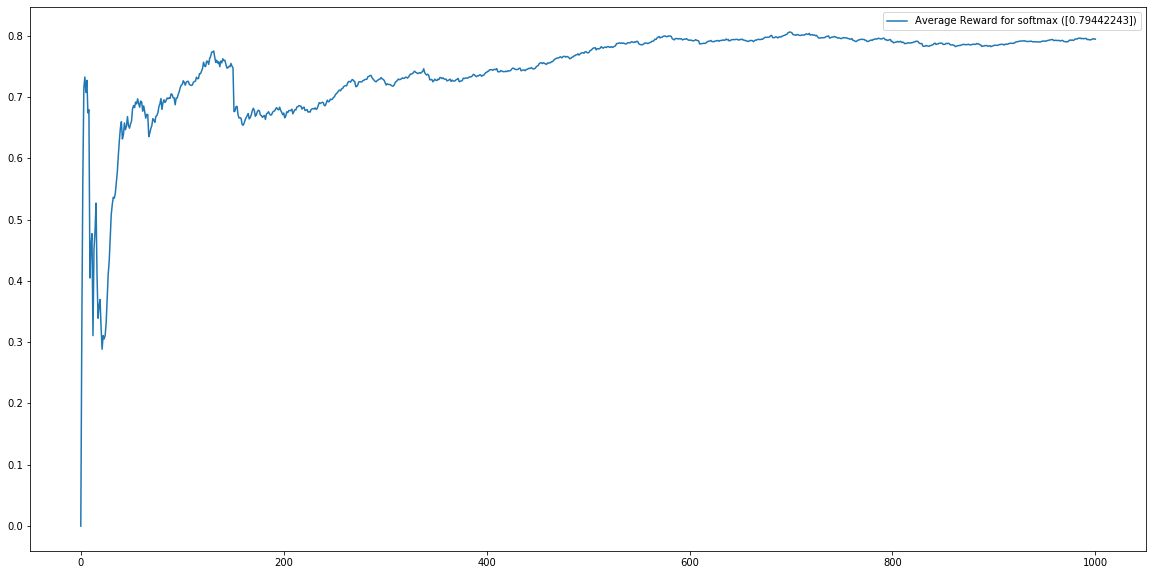

In [10]:
plt.figure(figsize=[20,10])
plt.plot(mean_h, label="Average Reward for softmax ({})".format(mean_h[-1]))
plt.legend()
plt.show()

# Problem 2 : UCB1
A company is running 10 different advertisement campaigns for a set of population on their webpage. 

The result of the campaign (which ad is clicked by the user in 10000 hours) had been recorded in the Ads_Optimisation.csv file.

Which campaign was the most successful?

Use UCB1 algorithm to find the answer

In [11]:
def func3(t = 10000):
    records = pd.read_csv("Ads_Optimisation.csv")
    history = []
    mean_h = [0]
    trials = np.ones(10)
    means = np.array(records.loc[0].values, dtype='float')
    for i in range(1, t):
        Util = means + np.sqrt(2*np.log(i)/trials)
        choice = np.argmax(Util)
        r = records.loc[i][choice]
        trials[choice] += 1
        means[choice] += (1/trials[choice])*(r - means[choice])
        history.append(np.array(means))
        mean_h.append(mean_h[i-1] + (1/(i+1))*(r - mean_h[i-1]) )  
    return  history, mean_h, Util

Arm  5 has the largest Utility


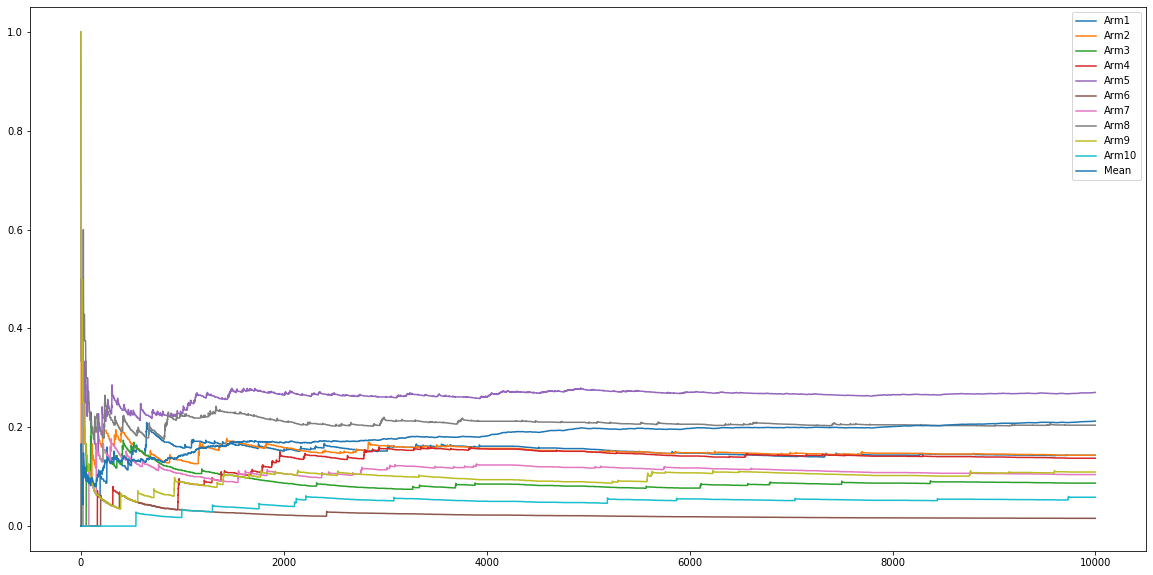

In [13]:
h, mean_h, util = func3()
print("Arm ", np.argmax(util) + 1, "has the largest Utility")
plt.figure(figsize=[20,10])
for i in range(10):
    plt.plot(np.array(h).T[i], label = 'Arm' + str(i+1))
plt.plot(mean_h, label = "Mean")
plt.legend()
plt.show()

# Problem 3 : Thompson Sampling
Consider the following 4-armed bandit:
    
- First arm results in a reward from N(3,25).
- Second arm results in a reward from N(15,16) with the probability of 0.7, and U(-15,10) with the probability of 0.3.
- Third arm results in a reward from U(-10,20).
- Fourth arm results in a reward from U(-5,25) with the probability of 0.6, and N(-5,25) with the probability of 0.4.

Note that you will not receive the rewards directly from the arms; instead, if the arm's reward is positive, you will get 1 as a reward; otherwise, you will receive a zero reward. Find the best arm with Thompson Sampling algorithm.
plot the total average reward that you received and the average reward of each arm. All plots should have proper labeling.

*The second parameter in normal distribution is variance not standard deviation.

In [14]:
def play(arm):
    chance = np.random.uniform(0, 1)
    if arm == 0:
        return np.random.normal(3, 5)
    
    elif arm == 1:
        if chance < 0.7:
            return np.random.normal(15, 4)
        else:
            return np.random.uniform(-15, 10)
        
    elif arm == 2:
        return np.random.uniform(-10, 20)
    
    elif arm == 3:
        if chance < 0.4:
            return np.random.normal(-5, 5)
        else:
            return np.random.uniform(-5, 25)

In [15]:
def func4(t = 1000):
    params = np.ones((4,2))
    history = []
    means = [0, 0, 0, 0]
    trials = [0, 0, 0, 0]
    mean_h = [0]
    for i in range(t):
        samples = []
        for p in params:
            samples.append(beta.rvs(p[0], p[1]))
        choice = np.argmax(samples)
        r = np.int(play(choice) > 0)
        params[choice][0] += r
        params[choice][1] += 1-r
        trials[choice] += 1
        means[choice] += (1/trials[choice])*(r - means[choice])
        history.append(np.array(means))
        mean_h.append(mean_h[i] + (1/(i+1))*(r - mean_h[i]) )  
    return history, mean_h, params

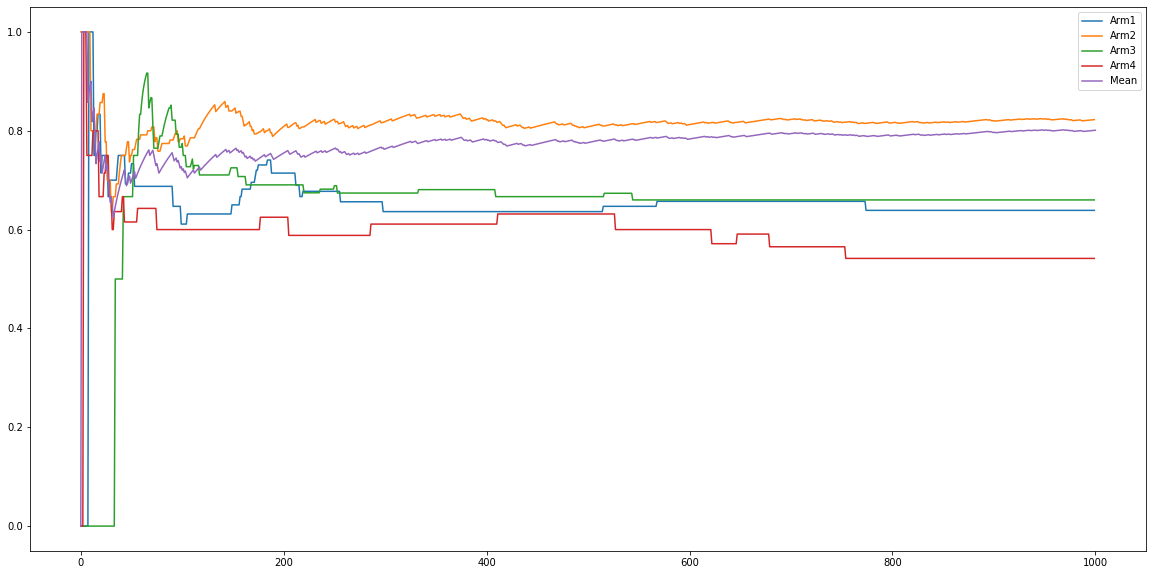

In [16]:
h, mean_h, params = func4(1000)
plt.figure(figsize=[20,10])
plt.plot(np.array(h).T[0], label = 'Arm1')
plt.plot(np.array(h).T[1], label = 'Arm2')
plt.plot(np.array(h).T[2], label = 'Arm3')
plt.plot(np.array(h).T[3], label = 'Arm4')
plt.plot(mean_h, label = "Mean")
plt.legend()
plt.show()

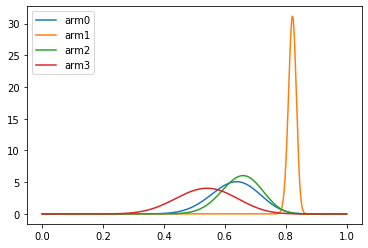

In [17]:
x = np.linspace(0, 1, 1000)
for i in range(4):
    y = beta.pdf(x, params[i][0], params[i][1])
    plt.plot(x, y, label = 'arm'+str(i))
plt.legend()
plt.show()